In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.dates import DateFormatter, WeekdayLocator , MonthLocator

<Axes: >

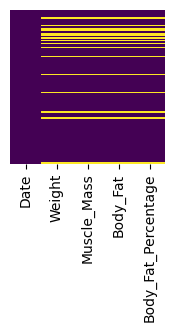

In [2]:
inbody_df = pd.read_csv('inbody.csv')
inbody_df = inbody_df.drop(columns=['Visceral_Fat','BMI'])

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # 禁用換行

inbody_df = pd.read_csv('inbody.csv')
inbody_df = inbody_df.drop(columns=['Visceral_Fat','BMI'])

#探索資料
plt.figure(figsize=(2, 2))
sns.heatmap(inbody_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [3]:
#檢查離奇數值
col_filter = 'Muscle_Mass'
std_range = 3
std_value = inbody_df[col_filter].std()
mean_value = inbody_df[col_filter].mean()
errorData = inbody_df[abs(inbody_df[col_filter] - mean_value) > std_range * std_value]
print(errorData)

inbody_df.loc[errorData.index,col_filter] = None
errorData = inbody_df[abs(inbody_df[col_filter] - mean_value) > std_range * std_value]
print(errorData)


      Date  Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage
187  11/12    62.5         17.4      13.6                 21.7
Empty DataFrame
Columns: [Date, Weight, Muscle_Mass, Body_Fat, Body_Fat_Percentage]
Index: []


    Date  Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage
0  05/09   67.20         28.5      16.1                 23.9
1  05/10   66.90         28.3      16.4                 24.5
2  05/11   66.70         27.9      16.9                 25.4
3  05/12   66.70         28.7      15.6                 23.4
4  05/13   67.25         28.4      16.7                 24.8


C:\Users\Tim\AppData\Local\Temp\ipykernel_17132\2171555111.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  inbody_df = inbody_df.interpolate(method='linear', axis=0)#內插資訊


<Axes: >

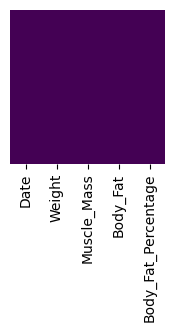

In [4]:
inbody_df = inbody_df.interpolate(method='linear', axis=0)#內插資訊
print(inbody_df.head(5))

#探索資料
plt.figure(figsize=(2, 2))
sns.heatmap(inbody_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
#正規化
def normalize_dataframe(df, col):
    to_normalize = scaler.fit_transform(df[[col]]) 
    df[col] = to_normalize

scaler = MinMaxScaler()

normalize = inbody_df

normalize_dataframe(normalize,'Weight')
normalize_dataframe(normalize,'Muscle_Mass')
normalize_dataframe(normalize,'Body_Fat')
normalize_dataframe(normalize,'Body_Fat_Percentage')

print(normalize)


      Date    Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage
0    05/09  0.900000     0.758621  0.689189             0.636364
1    05/10  0.850000     0.689655  0.729730             0.696970
2    05/11  0.816667     0.551724  0.797297             0.787879
3    05/12  0.816667     0.827586  0.621622             0.585859
4    05/13  0.908333     0.724138  0.770270             0.727273
..     ...       ...          ...       ...                  ...
212  12/07  0.066667     0.655172  0.094595             0.121212
213  12/08  0.116667     0.482759  0.270270             0.323232
214  12/09  0.116667     0.482759  0.270270             0.323232
215  12/10  0.116667     0.482759  0.270270             0.323232
216  12/11  0.116667     0.482759  0.270270             0.323232

[217 rows x 5 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


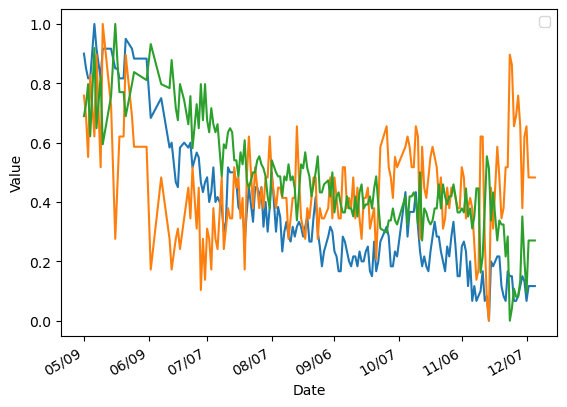

In [6]:


fig, ax = plt.subplots()
x = inbody_df["Date"]

# 设置 x 轴主刻度为每周
ax.xaxis.set_major_locator(MonthLocator())

def scatter_by_label(df,col_x,col_y):
    plt.scatter(df[col_x],df[col_y],s=3)
    plt.xlabel(col_x)
    plt.ylabel(col_y)

def plot_by_label(df,col_x,col_y):
    plt.plot(df[col_x],df[col_y])
    plt.xlabel(col_x)
    plt.ylabel(col_y)

plot_by_label(normalize,'Date','Weight')
plot_by_label(normalize,'Date','Muscle_Mass')
plot_by_label(normalize,'Date','Body_Fat')
#plot_by_label('Body_Fat_Percentage')
#plot_by_label('BMI')
#plot_by_label('Visceral_Fat')

# 添加图例
ax.legend()

# 添加 x 轴和 y 轴标签
plt.xlabel("Date")
plt.ylabel("Value")

# 自动调整日期标签以防止重叠
fig.autofmt_xdate()

# 显示图形
plt.show()


    Date  Squat_PR  Deadlift_PR  Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total
0  05/01     127.0          NaN      NaN             NaN         NaN                 NaN                NaN            7400.0
1  05/02       NaN          NaN      NaN            72.0         NaN              6175.0                NaN               NaN
2  05/03       NaN          NaN      NaN             NaN        81.0                 NaN             6066.0               NaN
3  05/04       NaN          NaN      NaN             NaN         NaN                 NaN                NaN               NaN
4  05/05       NaN          NaN      NaN             NaN         NaN                 NaN                NaN               NaN
5  05/06     127.0          NaN      NaN             NaN         NaN                 NaN                NaN            7780.0
6  05/07       NaN          NaN      NaN            86.0         NaN              7250.0                NaN           

<Axes: >

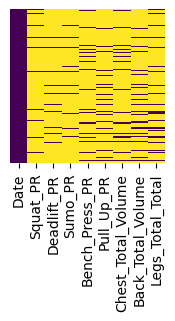

In [7]:
train_df = pd.read_csv('Train.csv')
pr_keys = ['Squat_PR','Deadlift_PR','Sumo_PR','Bench_Press_PR','Pull_Up_PR']

print(train_df.head(10))

#探索資料
plt.figure(figsize=(2, 2))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


    Date  Squat_PR  Deadlift_PR  Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total
0  05/01     127.0         74.0     90.0            72.0        81.0                 NaN                NaN            7400.0
1  05/02     127.0         74.0     90.0            72.0        81.0              6175.0                NaN               NaN
2  05/03     127.0         74.0     90.0            74.8        81.0                 NaN             6066.0               NaN
3  05/04     127.0         74.0     90.0            77.6        81.3                 NaN                NaN               NaN
4  05/05     127.0         74.0     90.0            80.4        81.6                 NaN                NaN               NaN
5  05/06     127.0         74.0     90.0            83.2        81.9                 NaN                NaN            7780.0
6  05/07     124.9         74.0     90.0            86.0        82.2              7250.0                NaN           

<Axes: >

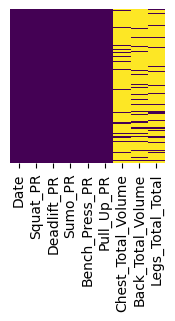

In [8]:
for pr_key in pr_keys:
    #內插資訊
    train_df[pr_key] = train_df[pr_key].interpolate(method='linear', axis=0)
    #補開頭
    train_df[pr_key].fillna(train_df[pr_key].ffill().bfill(), inplace=True)

print(train_df.head(10))

print(train_df.tail(10))

#探索資料
plt.figure(figsize=(2, 2))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


[0.00443185 0.02239453 0.07895016 0.19418605 0.3332246  0.39894228
 0.3332246  0.19418605 0.07895016 0.02239453 0.00443185]


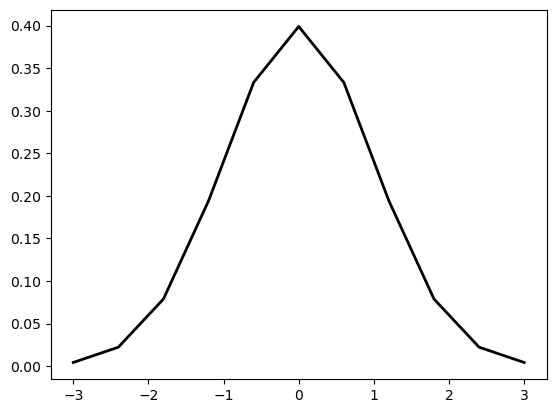

In [9]:
# 定义高斯分布的参数
mean_value = 0
std_dev = 1
array_size = 11

# 生成高斯分布的数据
x = np.linspace(mean_value - 3 * std_dev, mean_value + 3 * std_dev, array_size)
gd_ay = (1.0 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_value) / std_dev) ** 2)

# 绘制高斯分布曲线

plt.plot(x, gd_ay, 'k', linewidth=2)
print(gd_ay)

     Date    Squat_PR  Deadlift_PR     Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total  Total_Volume
0   05/01  127.000000        74.00   90.000000            72.0   81.000000         1022.929979         639.845436       3369.340855   5032.116270
1   05/02  127.000000        74.00   90.000000            72.0   81.000000         3064.131076        1004.873401       2105.265139   6174.269617
2   05/03  127.000000        74.00   90.000000            74.8   81.000000         1909.588871         636.809864       1425.534109   3971.932844
3   05/04  127.000000        74.00   90.000000            77.6   81.300000         1272.748818         439.735893       1435.130151   3147.614863
4   05/05  127.000000        74.00   90.000000            80.4   81.600000         1277.502262         468.468561       2510.464437   4256.435260
5   05/06  127.000000        74.00   90.000000            83.2   81.900000         1553.083075         503.716487       1648

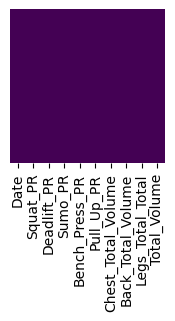

In [10]:
train_df['Total_Volume'] = train_df[['Chest_Total_Volume', 'Back_Total_Volume', 'Legs_Total_Total']].sum(axis=1)


#將訓練容量分散
def dispersion_Volume (col) :
    for i in range(len(train_df)) :
        val = train_df.loc[i, col]
        if val <= 0 or pd.isna(val):
            continue
        train_df.loc[i, col] = 0
        for j in range(-5,5) :
            addVal = gd_ay[j] * val 
            setIdx = i+j
            if setIdx < 0 or setIdx >= len(train_df) :
                continue
            if (pd.isna(train_df.loc[setIdx, col])):
                train_df.loc[setIdx, col] = 0
            train_df.loc[setIdx, col] += addVal

volume_kyes = ['Chest_Total_Volume','Back_Total_Volume','Legs_Total_Total','Total_Volume']
for volume_key in volume_kyes:
    dispersion_Volume(volume_key)

#探索資料
plt.figure(figsize=(2, 2))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#print("---")
print(train_df.head(30))


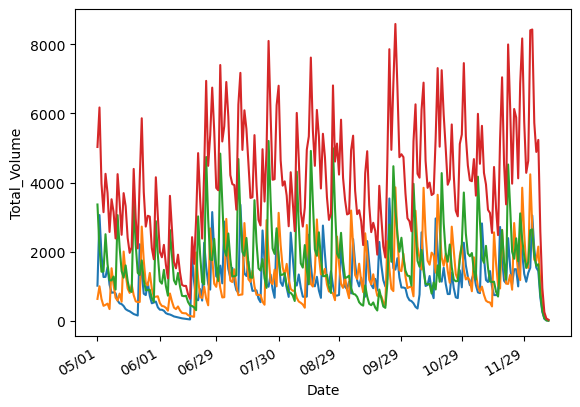

In [11]:
fig, ax = plt.subplots()
x = inbody_df["Date"]
ax.xaxis.set_major_locator(MonthLocator())

for volume_key in volume_kyes:
    plot_by_label(train_df,'Date',volume_key)

fig.autofmt_xdate()

In [12]:
#正規化
normalize_train_df = train_df

for col in normalize_train_df.columns:
    if(col != 'Date'):  
        normalize_dataframe(normalize_train_df,col)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


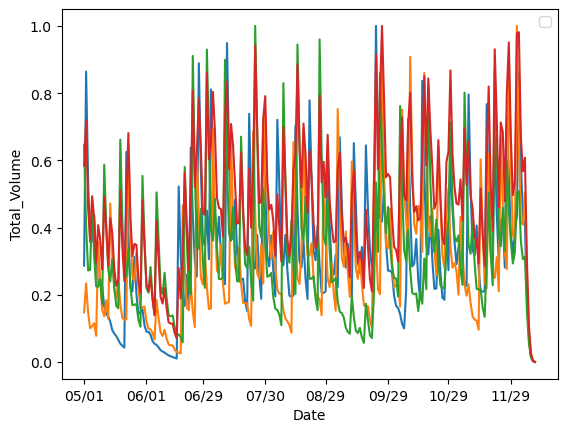

In [13]:
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MonthLocator())
ax.legend()
for volume_key in volume_kyes:
    plot_by_label(train_df,'Date',volume_key)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


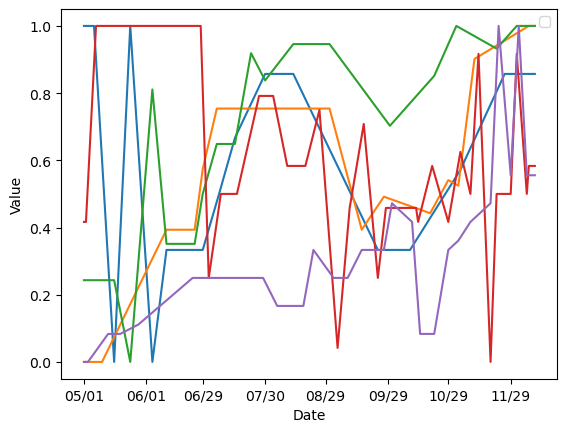

In [14]:
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MonthLocator())
ax.legend()

for pr_key in pr_keys:
    plot_by_label(train_df,'Date',pr_key)

plt.xlabel("Date")
plt.ylabel("Value")

# 显示图形
plt.show()

In [15]:
combine_df = pd.merge(inbody_df,train_df,on='Date',how='outer')
combine_df = combine_df.sort_values(by='Date').reset_index(drop=True)
combine_df = combine_df.iloc[8:]
print(combine_df.head(1))

    Date  Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage  Squat_PR  Deadlift_PR   Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total  Total_Volume
8  05/09     0.9     0.758621  0.689189             0.636364       0.7          0.0  0.243243             1.0        0.05            0.231603           0.241829          0.245394       0.36432


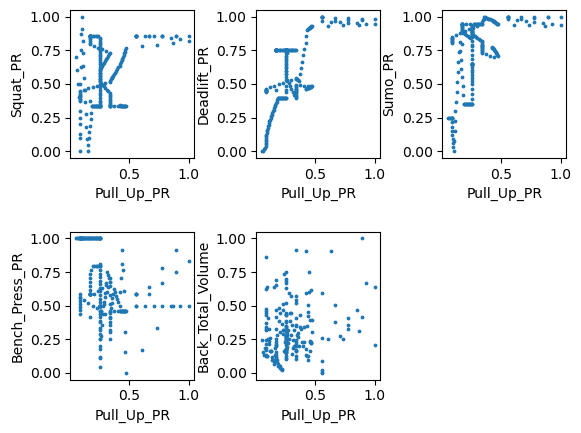

In [16]:
#'Pull_Up_PR' 跟 其他 PR 關係
#pr_keys = ['Squat_PR','Deadlift_PR','Sumo_PR','Bench_Press_PR','Pull_Up_PR']

fig = plt.figure()
fig.add_subplot(231)
scatter_by_label(combine_df, 'Pull_Up_PR','Squat_PR')
fig.add_subplot(232)
scatter_by_label(combine_df, 'Pull_Up_PR','Deadlift_PR')
fig.add_subplot(233)
scatter_by_label(combine_df, 'Pull_Up_PR','Sumo_PR')
fig.add_subplot(234)
scatter_by_label(combine_df, 'Pull_Up_PR','Bench_Press_PR')
fig.add_subplot(235)
scatter_by_label(combine_df, 'Pull_Up_PR','Back_Total_Volume')


plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()


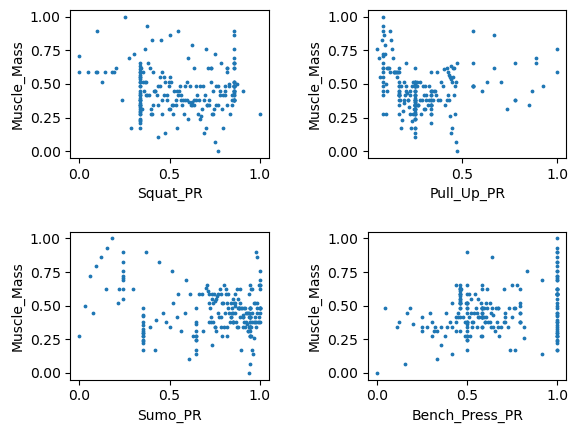

In [17]:
fig = plt.figure()
fig.add_subplot(221)
scatter_by_label(combine_df, 'Squat_PR','Muscle_Mass')
fig.add_subplot(222)
scatter_by_label(combine_df, 'Pull_Up_PR','Muscle_Mass')
fig.add_subplot(223)
scatter_by_label(combine_df, 'Sumo_PR','Muscle_Mass')
fig.add_subplot(224)
scatter_by_label(combine_df, 'Bench_Press_PR','Muscle_Mass')

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

#scatter_by_label(combine_df,'Sumo_PR','Squat_PR')
#scatter_by_label(combine_df,'Sumo_PR','Deadlift_PR')
#scatter_by_label(combine_df,'Sumo_PR','Bench_Press_PR')
#scatter_by_label(combine_df,'Sumo_PR','Pull_Up_PR')

#print(combine_df)


In [18]:
#g = sns.PairGrid(combine_df)
#g.map(plt.scatter)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = combine_df['Pull_Up_PR'].to_numpy()
y = combine_df['Sumo_PR'].to_numpy()

#x = combine_df['Weight'].to_numpy()
#y = combine_df['Body_Fat'].to_numpy()


In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#x = X_train
#y = y_train
X = x.reshape(-1,1)

(173, 5)
linear mse: 0.048049288715652526
polynomial mse: 0.040936024811039924
rbf mse: 0.04326035738537858


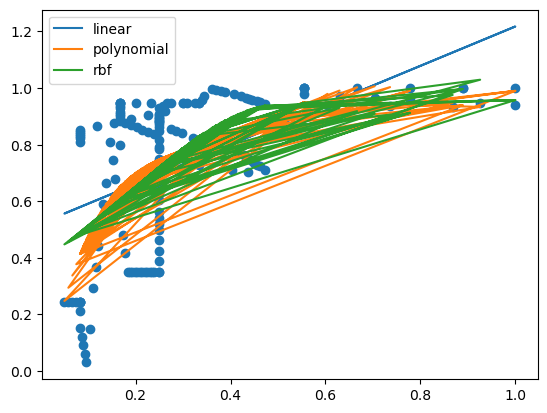

In [21]:

#=== linear === 
# y = wx + b
regr_lin = LinearRegression()
regr_lin.fit(X,y)

#=== 多項次 ===
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)
regr_poly = LinearRegression()
regr_poly.fit(X_poly, y)

#=== RBF ===
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

sigma = 0.3

X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])

regr_rbf = LinearRegression()
regr_rbf.fit(X_rbf, y)

#=== predict ===
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

print('linear mse:',np.sum((regr_lin.predict(X)-y)**2) / len(y))
print('polynomial mse:',np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))
print('rbf mse:',np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

